# Data Storytelling

## Part 3 Sentiment Analysis and Ratings
Finally, we want to handle rating per review, to define the consistency among opinion and rating score assigned by users. In this section, we use scrapping data from 3 webpages of Yelp, saved in the folder **Data_Extraction** as *reviews_rating.csv*
(This is the continuation of the notebook called *Sentiment_analyzer.ipynb*, that uses **TextBlob** to get *polarity* and *subjectivity* from sentences and discuss relation between two patterns)

First part is exactly the same:

Importing all relevant packages

In [223]:
from textblob.sentiments import PatternAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

We are using the sentiment function from TextBlob library to study *polarity* and *subjectivity* of data. According this function, *polarity* is between **-1 (negative result)** and **1 (positive result)** and *subjectivity* is between **0 (no subjective)** and **1 (absolutely subjective)**

In [224]:
def sentiment_parameters_Pattern(sentence):
    blob = TextBlob(sentence, analyzer=PatternAnalyzer())
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [225]:
df = pd.read_csv("../Data_Extraction/reviews_rating.csv", usecols=['Description','Rating'])

In [226]:
df.head()

,Description,Rating
0,$6.50 for a turmeric matcha seems a bit steep ...,3.0 star rating
1,It's not a far cry to say it's one of my favor...,5.0 star rating
2,"This place is fantastic - for coffee, toast, a...",5.0 star rating
3,Stopped in on our way out of San Fran because ...,4.0 star rating
4,Cute very friendly coffee shop on Divis. I got...,5.0 star rating


Cleaning Rating Serie

In [227]:
df['score'] = df['Rating'].str.split(' star rating').str.get(0)

In [228]:
score = []
reviews = []
polarity_Pattern = []
subjectivity_Pattern = []

Calculating *polarity* and *subjectivity*

In [229]:
for i in range(df.shape[0]):
    review = df.iloc[i, 0]
    p, s = sentiment_parameters_Pattern(review)
    score.append(float(df.iloc[i, 2]))
    polarity_Pattern.append(p)
    subjectivity_Pattern.append(s)

In [230]:
data_story = {'Review': df['Description'], 'Rating': score, 'Polarity_Pattern': polarity_Pattern, 'Subjectivity_Pattern': subjectivity_Pattern}
df_story = pd.DataFrame(data_story)

In [231]:
df_story.head()

,Review,Rating,Polarity_Pattern,Subjectivity_Pattern
0,$6.50 for a turmeric matcha seems a bit steep ...,3.0,0.142308,0.411722
1,It's not a far cry to say it's one of my favor...,5.0,0.265385,0.661538
2,"This place is fantastic - for coffee, toast, a...",5.0,0.531685,0.801014
3,Stopped in on our way out of San Fran because ...,4.0,0.288333,0.631667
4,Cute very friendly coffee shop on Divis. I got...,5.0,0.449643,0.675714


Now, we have a spectrum more huge of data (87 coffee shops) and we discover that subjectivity is distributed between 0 and 1, it means it is not depend on rating. About density of data, it is rasing with the score, implies that there are more reviews assigning high score than lower.

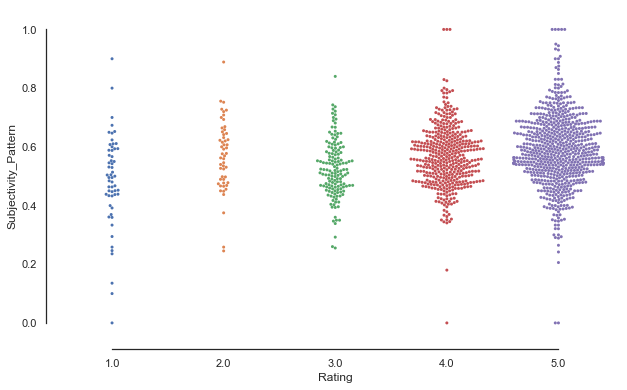

In [235]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 6))
g = sns.swarmplot(x="Rating", y="Subjectivity_Pattern", size=3, data=df_story1)
sns.despine(offset=10, trim=True)

*Polarity* has a clear tendency to arise his pattern score meanwhile rating arise to. It makes sense, because better rating must be imply better appreciation of the experience in the coffee shop.

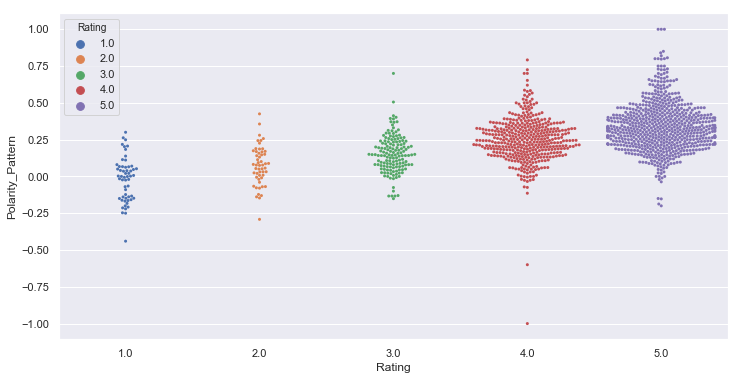

In [104]:
f, ax = plt.subplots(figsize=(12, 6))
#g = sns.catplot(x="Rating", y="Subjectivity_Pattern", kind="violin", data=df_story1, inner=None, palette="pastel")
sns.swarmplot(x="Rating", y="Polarity_Pattern", hue='Rating', size=3, data=df_story1)

Could we put all data together? We divide subjectivity data in 4 groups and add this information as huge in the graph above. In this case, we could see that reviews are medianly subjectives (SUMA por trama). Histograma 

In [105]:
groups = df_story1['Subjectivity_Pattern'].apply(lambda n: 1 if n>=0.75 else(2 if n >=0.5 else(3 if n>=0.25 else 4)))

In [108]:
df_story1['Subject_groups'] = groups

In [109]:
df_story1.head()

,Review,Rating,Polarity_Pattern,Subjectivity_Pattern,Subject_groups
0,$6.50 for a turmeric matcha seems a bit steep ...,3.0,0.142308,0.411722,3
1,It's not a far cry to say it's one of my favor...,5.0,0.265385,0.661538,2
2,"This place is fantastic - for coffee, toast, a...",5.0,0.531685,0.801014,1
3,Stopped in on our way out of San Fran because ...,4.0,0.288333,0.631667,2
4,Cute very friendly coffee shop on Divis. I got...,5.0,0.449643,0.675714,2


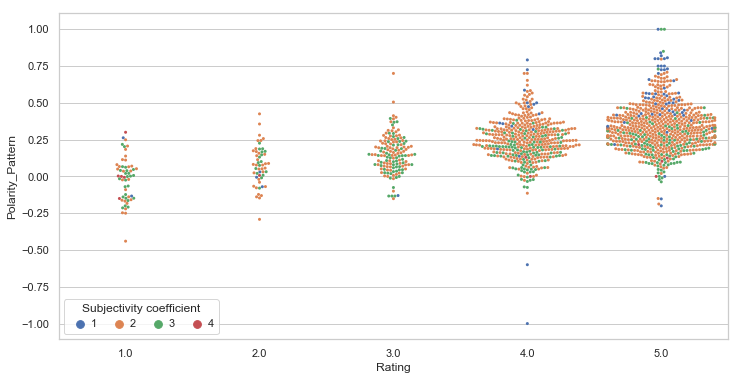

In [198]:
f, ax = plt.subplots(figsize=(12, 6))
#g = sns.catplot(x="Rating", y="Subjectivity_Pattern", kind="violin", data=df_story1, inner=None, palette="pastel")
#sns.set_style("whitegrid")
sns.swarmplot(x="Rating", y="Polarity_Pattern", hue="Subject_groups", size=3, data=df_story1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Subjectivity coefficient",
          handletextpad=0, columnspacing=1,
          loc="lower left", ncol=4, frameon=True)

How much data per rating score there is here?

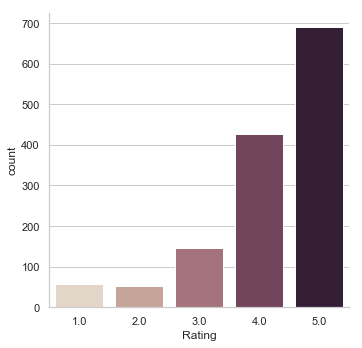

In [204]:
sns.catplot(x="Rating", kind="count", palette="ch:.25", data=df_story1)